In [1]:
from stanfordcorenlp import StanfordCoreNLP
nlp = StanfordCoreNLP(r'../data/stanford-corenlp-full-2018-02-27', memory='8g',timeout=3000)

In [2]:
from nltk import Tree
import nltk
from functools import reduce

def binarize(tree):
    """
    Recursively turn a tree into a binary tree.
    """
    if isinstance(tree, str):
        return tree
    elif len(tree) == 1:
        return binarize(tree[0])
    else:
        label = tree.label()
        return reduce(lambda x, y: Tree(label, (binarize(x), binarize(y))), tree)

In [14]:
sentence = "The food looks fresh, but service is poor"

In [15]:
nlp.pos_tag(sentence)

[('The', 'DT'),
 ('food', 'NN'),
 ('looks', 'VBZ'),
 ('fresh', 'JJ'),
 (',', ','),
 ('but', 'CC'),
 ('service', 'NN'),
 ('is', 'VBZ'),
 ('poor', 'JJ')]

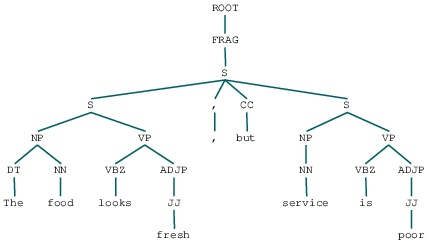

In [16]:
parse_tree = nlp.parse(sentence)
nltk_tree = Tree.fromstring(parse_tree)
nltk_tree

In [6]:
parse_tree = re.sub('\n', '', parse_tree)

NameError: name 're' is not defined

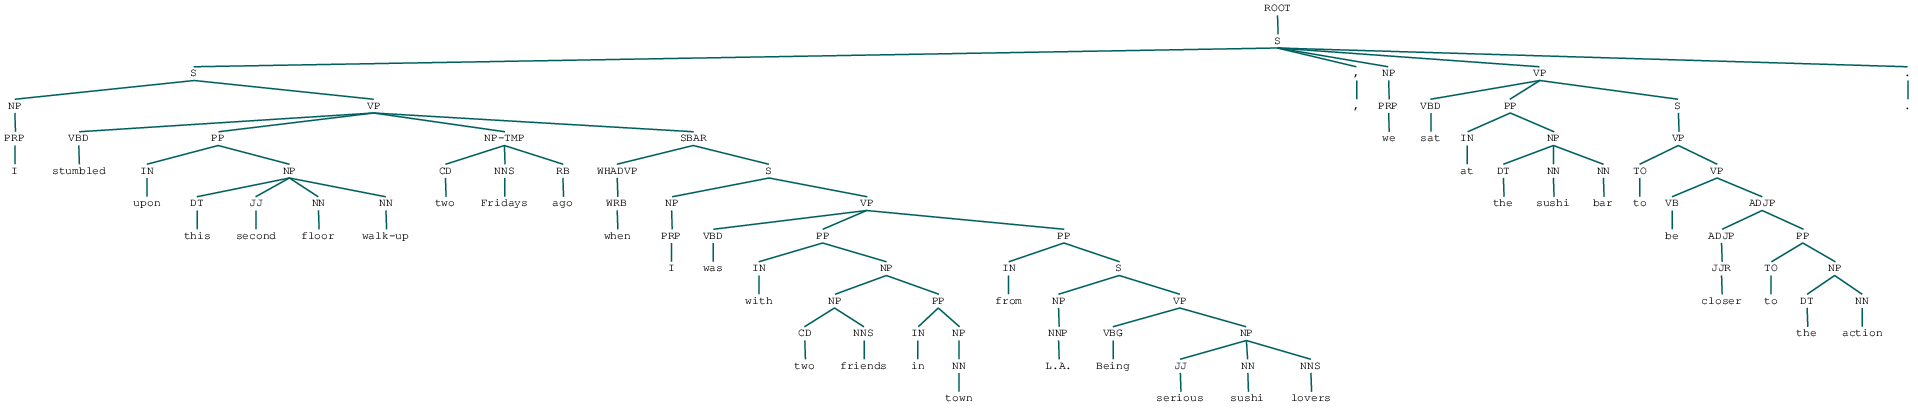

In [7]:
nltk_tree = Tree.fromstring(parse_tree)
nltk_tree

In [57]:
#nlp.dependency_parse(sentence)

In [58]:
nodes = []
def traverse_tree(tree):
    nodes.append(tree.label())
    for subtree in tree:
        if type(subtree) == nltk.tree.Tree:
            traverse_tree(subtree)
        else:
            print(subtree)

traverse_tree(nltk_tree)

To
be
completely
fair
,
the
only
redeeming
factor
was
the
food
which
was
above
average
but
could
n't
make
up
for
all
the
other
deficiencies
of
Teodora


In [24]:
nodes

['S', 'S', 'S', 'VP', 'NP', 'NP', 'PP', 'NP', 'NP']

In [19]:
trees = []
import re
with open('data/test_tree.txt', 'w') as f:
    for item in test_data:
        parse_tree = nlp.parse(item[4])
        nltk_tree = Tree.fromstring(parse_tree)
        b_tree = binarize(nltk_tree)
        line = str(b_tree)
        line = re.sub('\n', ' ', line)
        line = ' '.join(line.split())
        f.write(line+'||' + str(item[2])+'||'+' '.join(item[5])+'\n')

In [61]:
sent_vecs, mask_vecs, label_list, sent_lens, texts, targets = next(dg_train.get_ids_samples())

In [3]:
import en_core_web_sm
import spacy
spanlp = en_core_web_sm.load()

In [4]:
sentence = "The signs, the specials menus, food, and even all the waitstaff are ALL TOTALLY Japanese."

In [5]:
# document = spanlp(sentence)
# for item in document:
#     print('|||||||')
#     print(item)
#     print('****head')
#     print(item.head)
#     print('###child')
#     for child in item.children:
#         print(child)

In [5]:
# import networkx as nx
# document = spanlp(sentence)
# edges = []
# for token in document:
#     # FYI https://spacy.io/docs/api/token
#     for child in token.children:
#         edges.append(('{0}-{1}'.format(token.lower_,token.i),
#                     '{0}-{1}'.format(child.lower_,child.i)))

# # document = nlp.dependency_parse(sentence)
# # words = nlp.word_tokenize(sentence)
# for token in document:
#     # FYI https://spacy.io/docs/api/token
#     for child in token.children:
#         edges.append(('{0}-{1}'.format(token.lower_,token.i),
#                     '{0}-{1}'.format(child.lower_,child.i)))
# graph = nx.Graph(edges)

In [57]:
nx.shortest_path_length(graph, source='food-1', target='capable-9')

4

In [58]:
nx.shortest_path_length(graph, source='food-1', target='uniformly-3')

3

In [59]:
nx.shortest_path_length(graph, source='food-1', target='exceptional-4')

2

In [5]:
from data_reader_general import data_reader, data_generator
from backup.configs.config_crf_glove import config

In [6]:
dr = data_reader(config)
train_data = dr.load_data(config.train_path)
valid_data = dr.load_data(config.valid_path)
test_data = dr.load_data(config.test_path)
print("Training Samples: {}".format(len(train_data)))
print("Validating Samples: {}".format(len(valid_data)))
print("Testing Samples: {}".format(len(test_data)))

dg_train = data_generator(config, train_data)
dg_valid = data_generator(config, valid_data, False)
dg_test = data_generator(config, test_data, False)

Training Samples: 3001
Validating Samples: 601
Testing Samples: 1120


In [24]:
def get_dependency(text, targets):
    doc = spanlp(text)
    dependent_list = []
    for target in targets:
        #print(target)
        for token in doc:
        # FYI https://spacy.io/docs/api/token
            if token.text != target:
                continue
            
            dependent_list.append(token.head.text)
            dependent_list.append(token.text)
            for child in token.children:
                dependent_list.append(child.text)
    return dependent_list

In [25]:
sentence = "The food and the service are good."
dependent_list = get_dependency(sentence, ['food'])

In [26]:
dependent_list

['are', 'food', 'The', 'and', 'service']

In [7]:
# doc = spanlp("The food and the service are good.")

# for token in doc:
#     print('######')
#     print(token)
#     for child in token.children:
#         print(child.text,  child.dep_)

In [10]:
tags_all = []
for item in train_data:
    doc = nlp.pos_tag(item[4])
    tags = [t for w, t in doc]
    tags_all.extend(tags)

In [11]:
for item in valid_data:
    doc = nlp.pos_tag(item[4])
    tags = [t for w, t in doc]
    tags_all.extend(tags)

In [12]:
for item in test_data:
    doc = nlp.pos_tag(item[4])
    tags = [t for w, t in doc]
    tags_all.extend(tags)

In [13]:
len(tags_all)

88942

In [16]:
import numpy as np
np.unique(tags_all)

array(["''", ',', '.', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR',
       'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP',
       'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD',
       'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WRB', '``'], dtype='<U4')

## Load Tree Data

In [33]:
train_file = 'data/parse_trees/res_train_trees.txt'
dev_file = 'data/parse_trees/res_dev_trees.txt'
test_file = 'data/parse_trees/res_test_trees.txt'

Training Samples: 3001
Validating Samples: 601
Testing Samples: 1120


In [55]:
trees = []
labels = []
targets = []
with open(train_file) as f:
    for line in f:
        item = line.split('|||')
        trees.append(item[0])
        targets.append(item[1])
        labels.append(item[3])

In [17]:
import pandas as pd
data = pd.read_csv('data/mitchell/train.1.csv')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2787 entries, 0 to 2786
Data columns (total 5 columns):
text      2787 non-null object
target    2787 non-null object
label     2787 non-null object
start     2787 non-null int64
end       2787 non-null int64
dtypes: int64(2), object(3)
memory usage: 108.9+ KB
